In [58]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.stats import linregress

In [59]:
variants_final_df = pd.read_csv('./results-newtimepts/variants_final.csv')
fitness_initial_df = pd.read_csv('./results-newtimepts/fitnesses_initial.csv')
fitness_final_df = pd.read_csv('./results-newtimepts/fitnesses_final.csv')

In [60]:
assay_labels = fitness_initial_df.columns.to_list()
control_set_indices = (variants_final_df.index[variants_final_df['control_set'] == True]).tolist()
trustworthy_assay_labels = ['trustworthy_' + element for element in assay_labels]
trustworthy_assay_for_variants = variants_final_df[trustworthy_assay_labels].iloc[control_set_indices]
assay_hBFA1 = 'hBFA1:'
assay_labels = [item.replace(assay_hBFA1, '') for item in assay_labels]
control_fitness_values_init = fitness_initial_df.iloc[control_set_indices]

control_fitness_values_init.columns = assay_labels
trustworthy_assay_for_variants.columns = assay_labels

control_fitness_values_init = control_fitness_values_init[trustworthy_assay_for_variants]

control_fitness_values_final = fitness_final_df.iloc[control_set_indices]

control_fitness_values_final.columns = assay_labels
control_fitness_values_final = control_fitness_values_final[trustworthy_assay_for_variants]


Delta_f = control_fitness_values_init - control_fitness_values_final
delta_f = control_fitness_values_init - control_fitness_values_init.apply(np.nanmean)

delta_f

,21C-R1,21C-R2,37C-R1,37C-R2,48Hr-R1,48Hr-R2,FLC4-R2,GlyEtOH-R1,GlyEtOH-R2,SC-R1,SC-R2,YPD-R1,YPD-R2,pH3.8-R1,pH3.8-R2,pH7.3-R1,pH7.3-R2
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,-0.005861,-0.006145,NaN,NaN,-0.001979,0.093389,NaN,0.368482,0.375823,NaN,0.331739,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,-0.059883,0.020438,-0.084481,-0.019660,NaN,0.391028,0.423597,0.051716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.031373,-0.042704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,NaN,NaN,-0.014349,-0.013016,NaN,NaN,NaN,0.004875,-0.001365,-0.036028,-0.003720,-0.006422,-0.010893,-0.017291,-0.021818,0.021735,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Figure 4

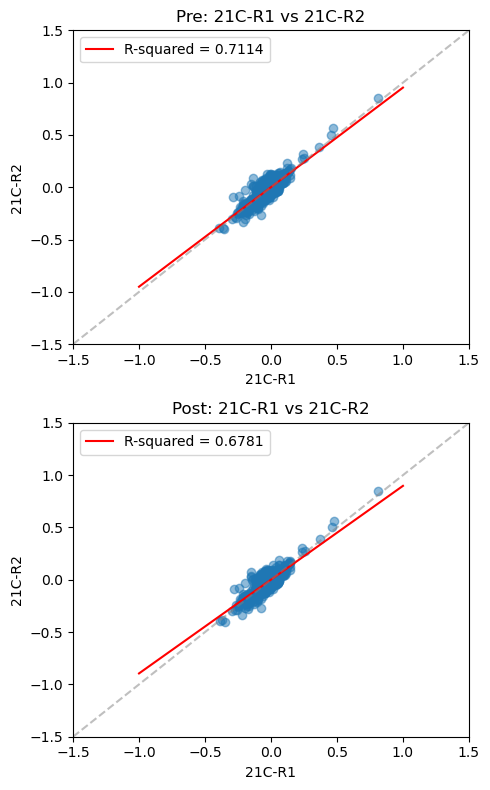

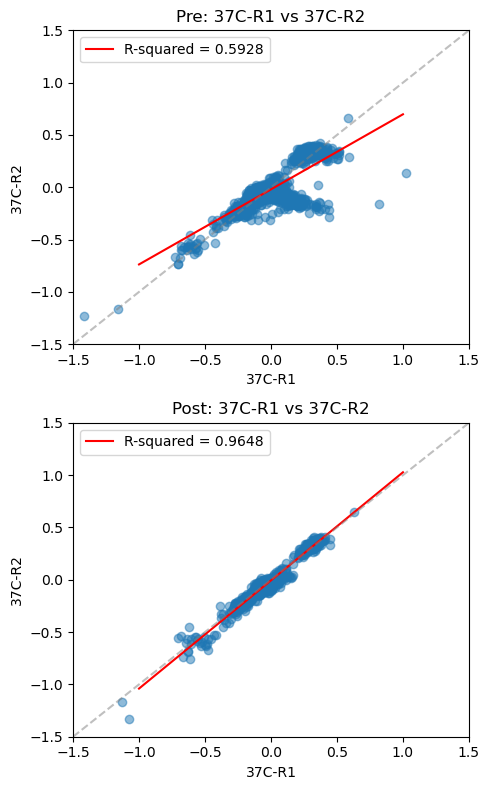

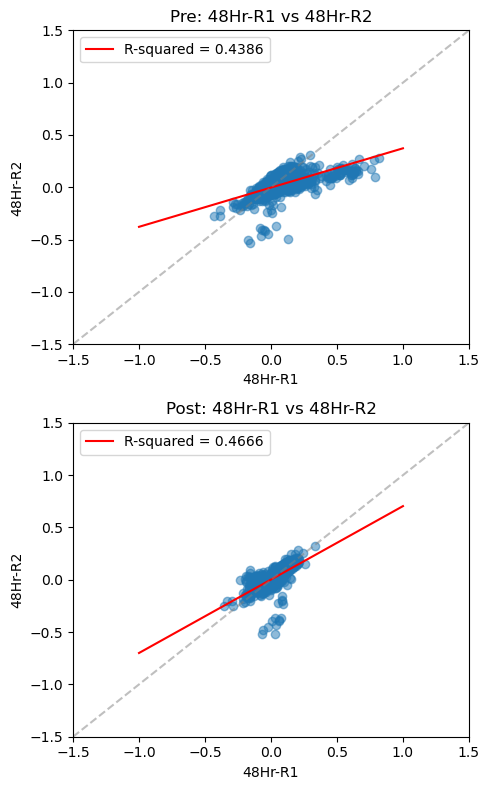

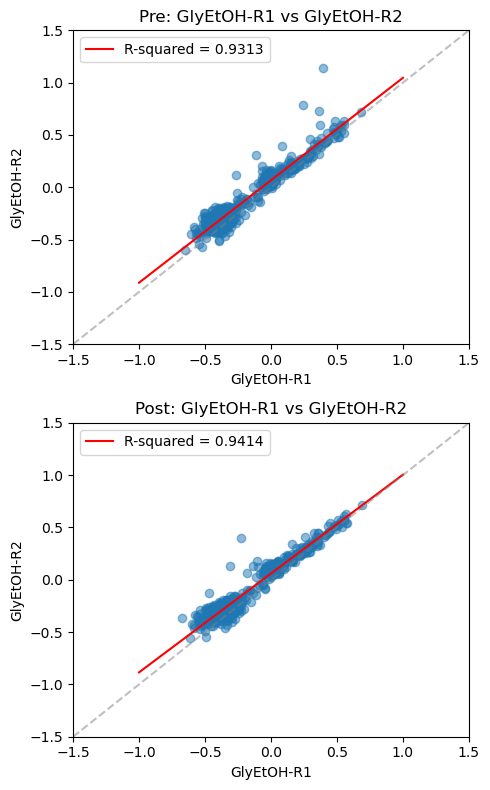

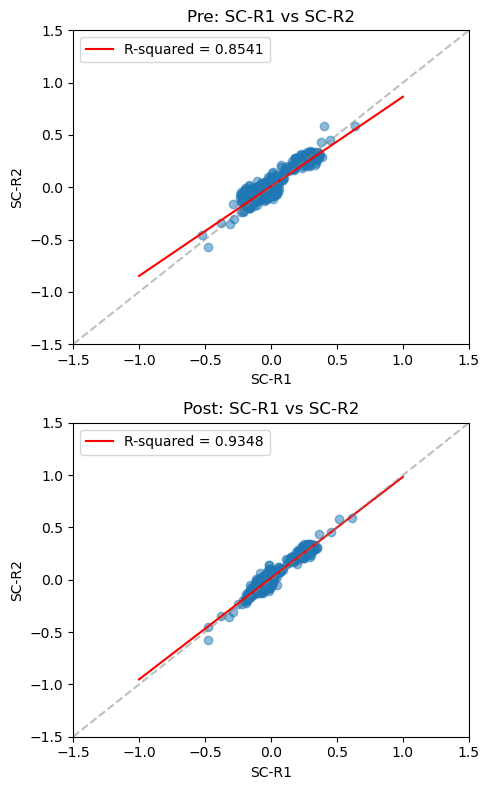

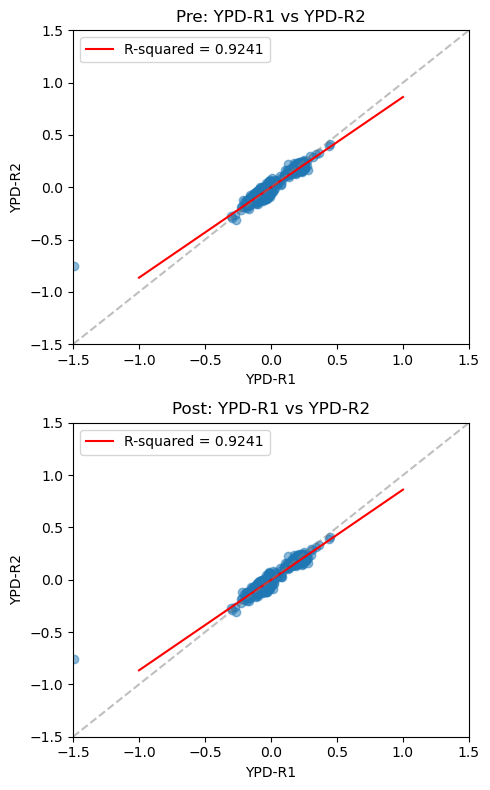

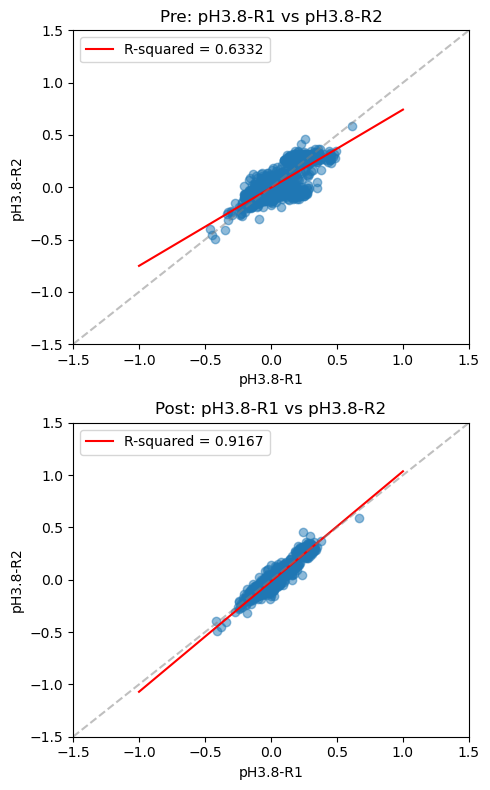

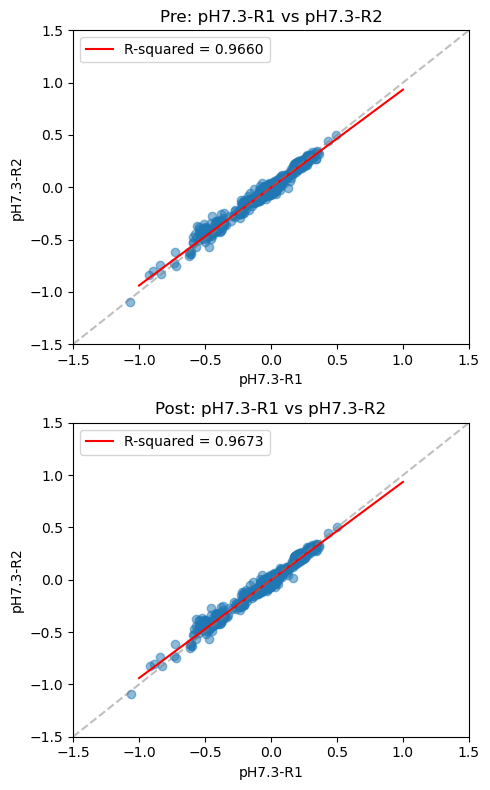

In [67]:
fitness_all = fitness_final_df.copy()
assay_labels_all = fitness_final_df.columns.to_list()
# control_set_indices = (variants_final_df.index[variants_final_df['control_set'] == True]).tolist()
trustworthy_assay_labels_all = ['trustworthy_' + element for element in assay_labels_all]
trustworthy_assay_for_variants_all = variants_final_df[trustworthy_assay_labels_all]
# assay_hBFA1 = 'hBFA1:'
assay_labels_all = [item.replace(assay_hBFA1, '') for item in assay_labels_all]
# control_fitness_values_init = fitness_initial_df.iloc[control_set_indices]

fitness_all.columns = assay_labels_all
trustworthy_assay_for_variants_all.columns = assay_labels_all

fitness_all = fitness_all[trustworthy_assay_for_variants_all]
fitness_pairs = fitness_all.drop('FLC4-R2', axis=1)
columns = fitness_pairs.columns

fitness_all_init = fitness_initial_df.copy()
fitness_all_init.columns = assay_labels_all


fitness_all_init = fitness_all_init[trustworthy_assay_for_variants_all]
fitness_pairs_init = fitness_all_init.drop('FLC4-R2', axis=1)
columns = fitness_pairs.columns
# columns

for i in range(0, len(columns) - 1, 2):

    f_R1_final = fitness_pairs[columns[i]]
    f_R2_final = fitness_pairs[columns[i+1]]

    f_R1_init = fitness_pairs_init[columns[i]]
    f_R2_init = fitness_pairs_init[columns[i+1]]

    mask_R12 = ~np.isnan(f_R1_final) & ~np.isnan(f_R2_final)
    f_R1_final = f_R1_final[mask_R12]
    f_R2_final = f_R2_final[mask_R12]

    mask_R12 = ~np.isnan(f_R1_init) & ~np.isnan(f_R2_init)
    f_R1_init = f_R1_init[mask_R12]
    f_R2_init = f_R2_init[mask_R12]

    # Create subplot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8))

    #  Plot for initial fitness
    ax1.scatter(f_R1_init, f_R2_init, alpha=0.5)
    slope_init, intercept_init, r_value_init, _, _ = linregress(f_R1_init, f_R2_init)
    x_line = np.array([-1, 1])
    line_init = slope_init * x_line + intercept_init
    ax1.plot(x_line, line_init, color='r', label=f'R-squared = {r_value_init**2:.4f}')
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-1.5, 1.5)
    ax1.plot([-1.5, 1.5], [-1.5, 1.5], color='gray', linestyle='--', alpha=0.5)
    ax1.set_xlabel(columns[i])
    ax1.set_ylabel(columns[i+1])
    ax1.set_title(f'Pre: {columns[i]} vs {columns[i+1]}')
    ax1.legend()

    # Plot for final fitness
    ax2.scatter(f_R1_final, f_R2_final, alpha=0.5)
    slope_final, intercept_final, r_value_final, _, _ = linregress(f_R1_final, f_R2_final)
    line_final = slope_final * x_line + intercept_final
    ax2.plot(x_line, line_final, color='r', label=f'R-squared = {r_value_final**2:.4f}')
    ax2.set_xlim(-1.5, 1.5)
    ax2.set_ylim(-1.5, 1.5)
    ax2.plot([-1.5, 1.5], [-1.5, 1.5], color='gray', linestyle='--', alpha=0.5)
    ax2.set_xlabel(columns[i])
    ax2.set_ylabel(columns[i+1])
    ax2.set_title(f'Post: {columns[i]} vs {columns[i+1]}')
    ax2.legend()

    plt.tight_layout()
    plt.show()
    
    # Save the plot
    plt.savefig(f'scatter_plot_{columns[i]}_{columns[i+1]}.png')
    plt.close()

    





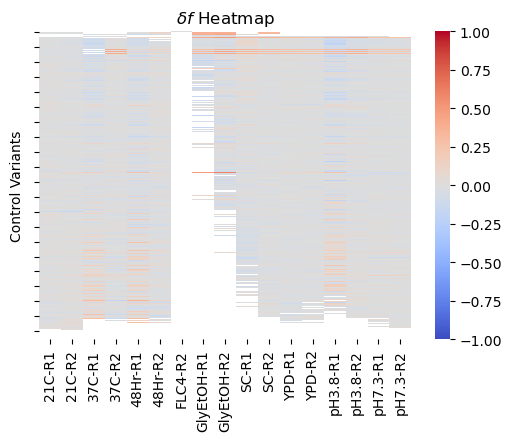

In [62]:
plt.figure(figsize=(6,4))
sns.heatmap(delta_f, cmap='coolwarm',vmin=-1,vmax=1)
# plt.xlabel('Assay Labels')
plt.ylabel('Control Variants')
plt.gca().set_yticklabels([])
plt.title('$\delta f$ Heatmap')
plt.show()

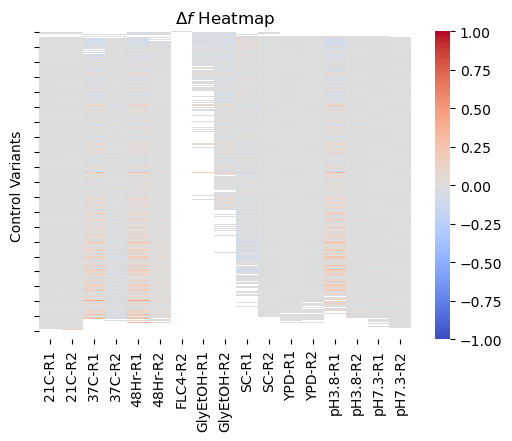

In [63]:
plt.figure(figsize=(6,4))
sns.heatmap(Delta_f, cmap='coolwarm',vmin=-1,vmax=1)
# plt.xlabel('Assay Labels')
plt.ylabel('Control Variants')
plt.gca().set_yticklabels([])
plt.title('$\Delta f$ Heatmap')
plt.show()

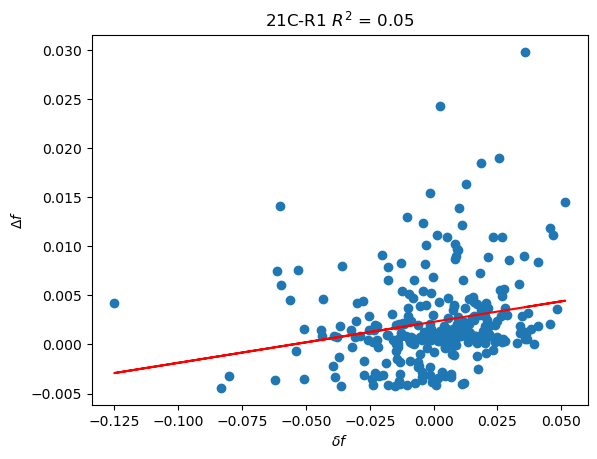

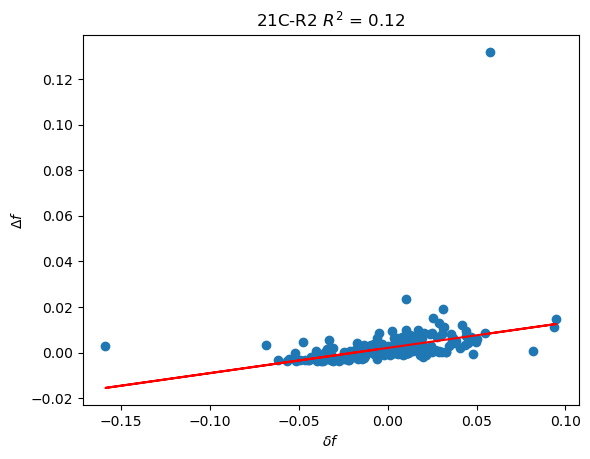

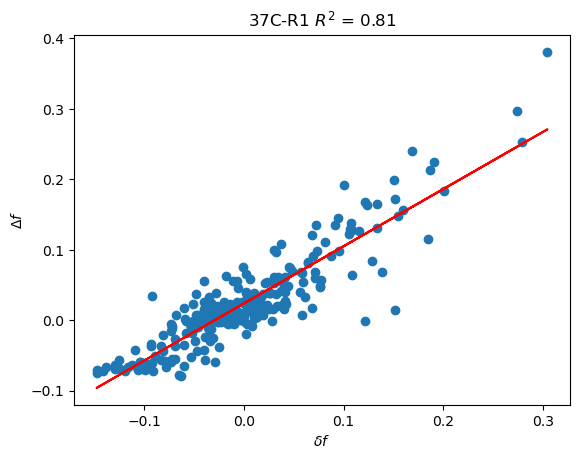

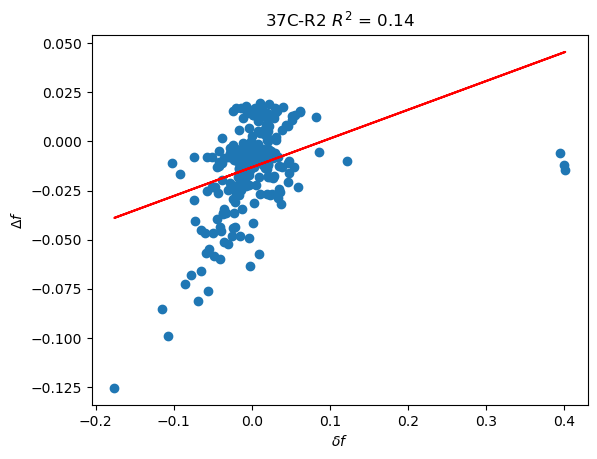

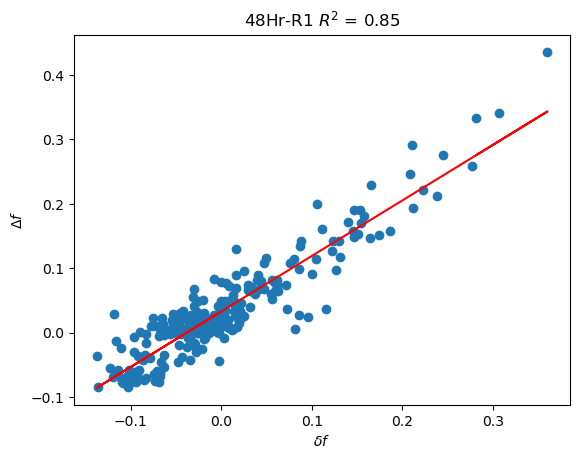

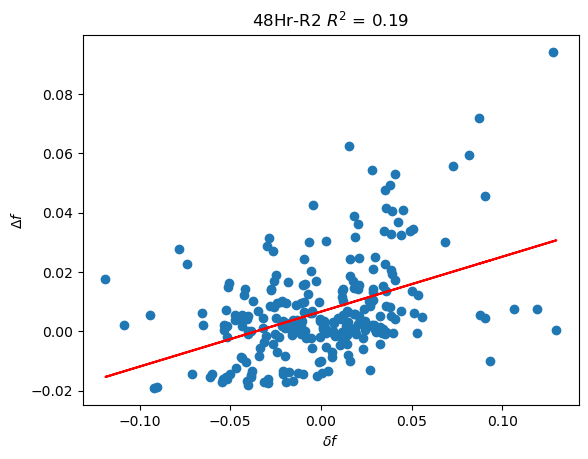

/Users/yanjiahao/anaconda3/envs/Bio/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/yanjiahao/anaconda3/envs/Bio/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/yanjiahao/anaconda3/envs/Bio/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


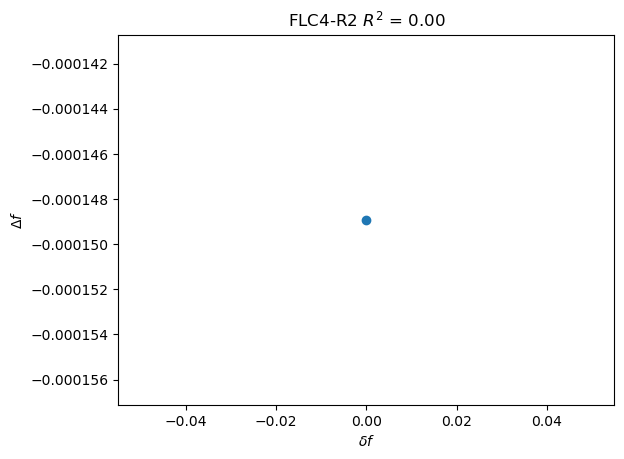

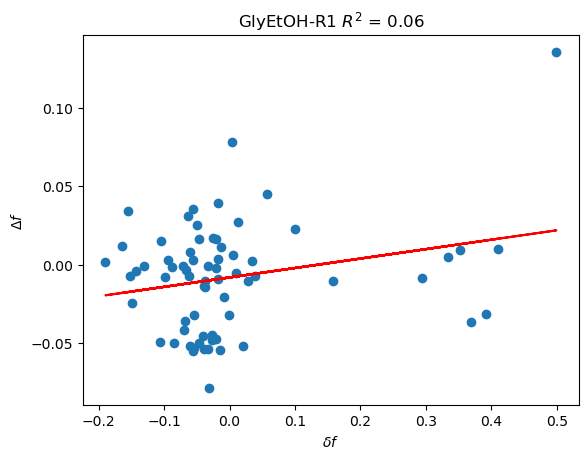

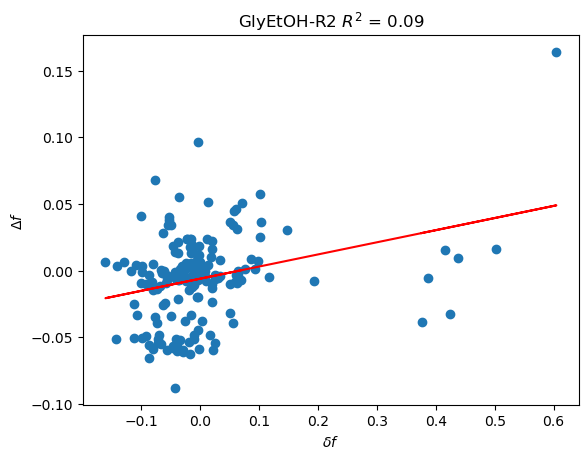

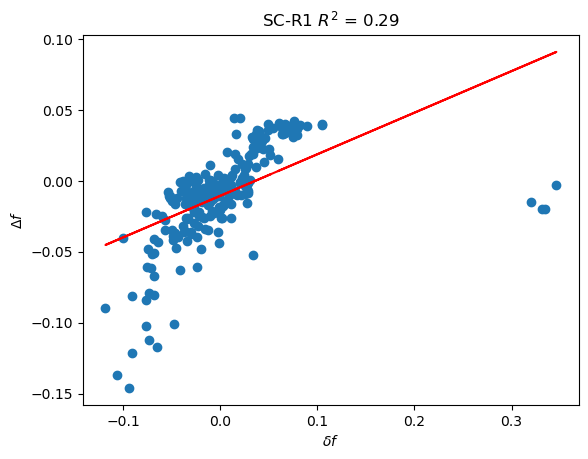

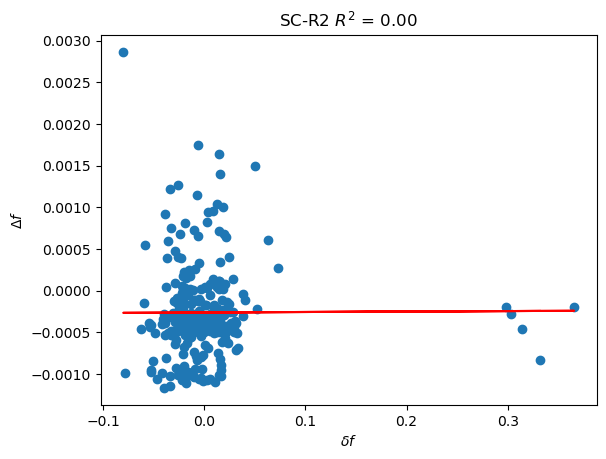

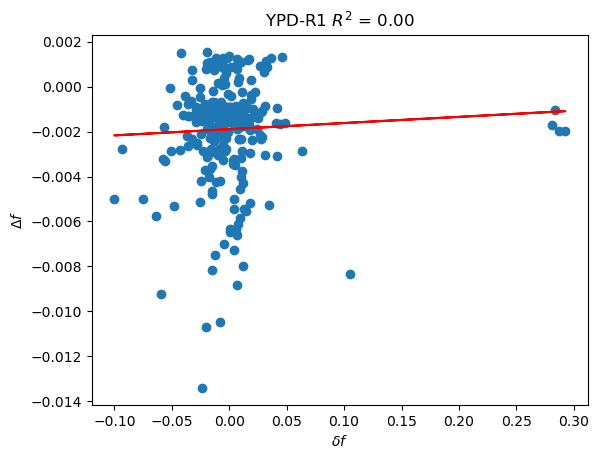

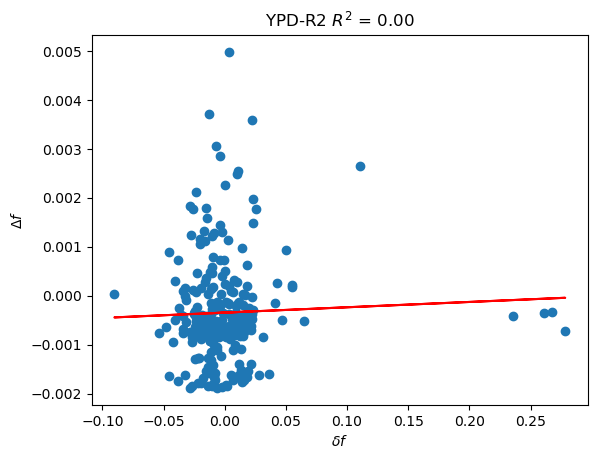

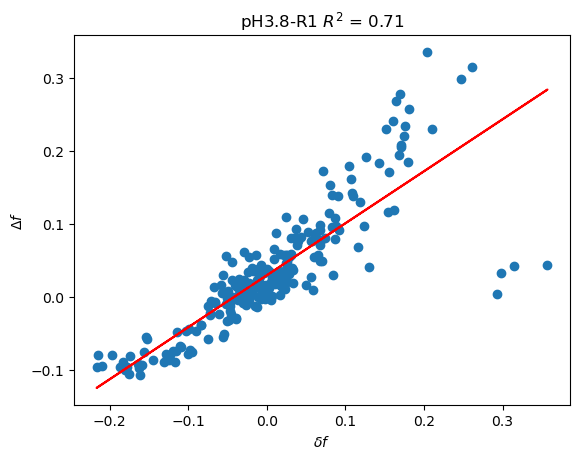

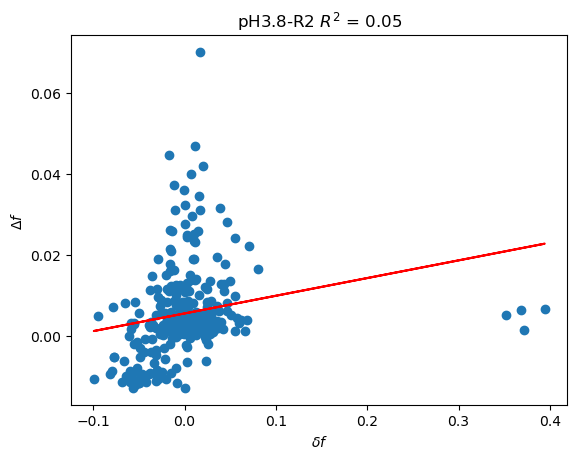

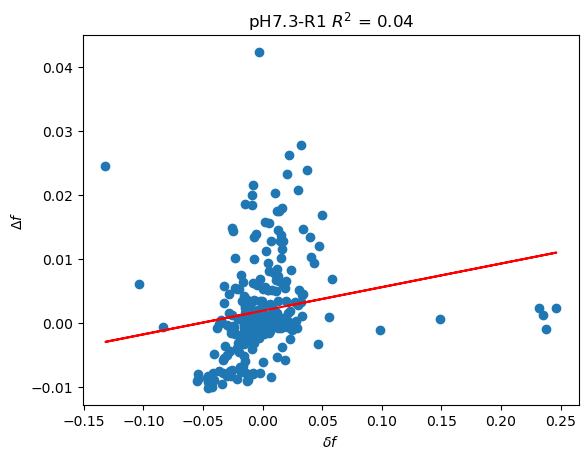

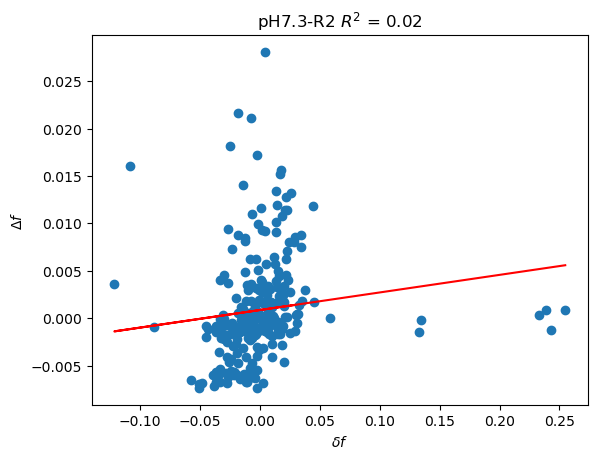

In [64]:
for i in range(delta_f.shape[1]):
    del_nan = delta_f[assay_labels[i]].values[~np.isnan(delta_f[assay_labels[i]].values)]
    Del_nan = Delta_f[assay_labels[i]].values[~np.isnan(Delta_f[assay_labels[i]].values)]
    slope, intercept, rvalue, pvalue, std = linregress(del_nan, Del_nan)
    line = slope * del_nan + intercept

    plt.scatter(x = del_nan, y=Del_nan)
    plt.plot(del_nan, line, color='red')
    plt.xlabel('$\delta f$')
    plt.ylabel('$\Delta f$')
    plt.title(assay_labels[i] +' $R^2$ = {:.2f}'.format(rvalue**2))

    plt.show()